<h1 style="fonts-size:3rem;color:green;">Airprot Passenger Data Visualization for The Year 2024</h1>

<img src="https://www.shutterstock.com/shutterstock/videos/1084670956/thumb/8.jpg?ip=x480">

In [31]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
# load the dataset

df = pd.read_csv(r"C:\Users\Ali_a\OneDrive\Desktop\Datasets\Airport Passenger Data.csv")

In [39]:
df.head()

,Passenger_ID,First_Name,Last_Name,Gender,Age,Nationality,Airport_Name,Airport_Country_Code,Country_Name,Airport_Continent,Continents,Departure_Date,Arrival_Airport,Pilot_Name,Flight_Status
0,ABVWIg,Edithe,Leggis,Female,32,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2024,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,32,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2024,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,32,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2024,GNB,Rhonda Amber,Delayed
3,BRS38V,Dominica,Pyle,Female,32,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2024,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2024,SEE,Ebonee Tree,On Time


In [41]:
# dataset overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger_ID          98619 non-null  object
 1   First_Name            98619 non-null  object
 2   Last_Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport_Name          98619 non-null  object
 7   Airport_Country_Code  98619 non-null  object
 8   Country_Name          98619 non-null  object
 9   Airport_Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure_Date        98619 non-null  object
 12  Arrival_Airport       98619 non-null  object
 13  Pilot_Name            98619 non-null  object
 14  Flight_Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [43]:
# check for missing values

df.isnull().sum()

Passenger_ID            0
First_Name              0
Last_Name               0
Gender                  0
Age                     0
Nationality             0
Airport_Name            0
Airport_Country_Code    0
Country_Name            0
Airport_Continent       0
Continents              0
Departure_Date          0
Arrival_Airport         0
Pilot_Name              0
Flight_Status           0
dtype: int64

In [45]:
# check for duplicates

df.duplicated().sum()

0

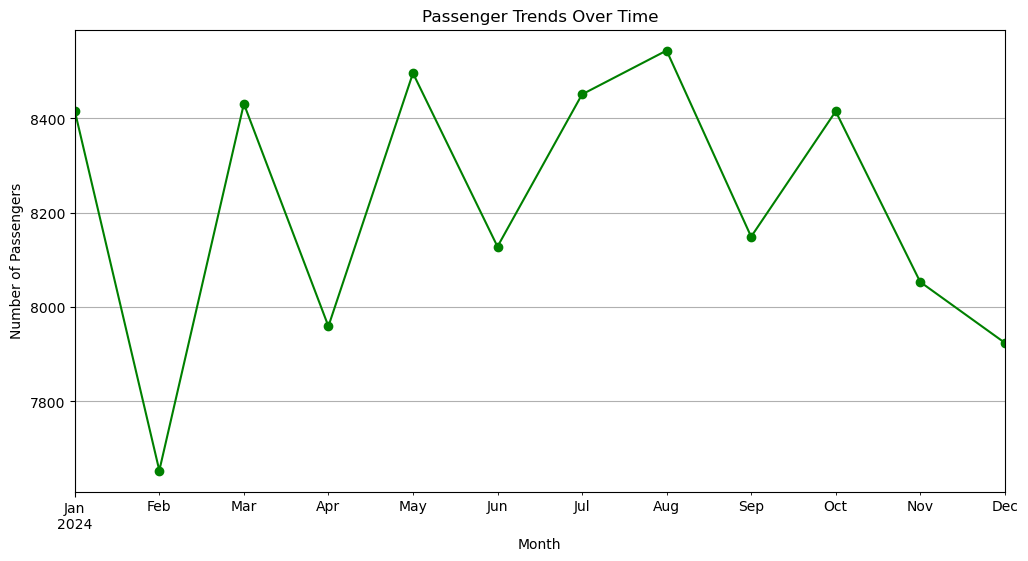

In [47]:
# passenger trends over time

plt.figure(figsize=(12, 6))
df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])
passenger_trends = df.groupby(df['Departure_Date'].dt.to_period('M')).size()
passenger_trends.plot(kind='line', marker='o', color='green')
plt.title('Passenger Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


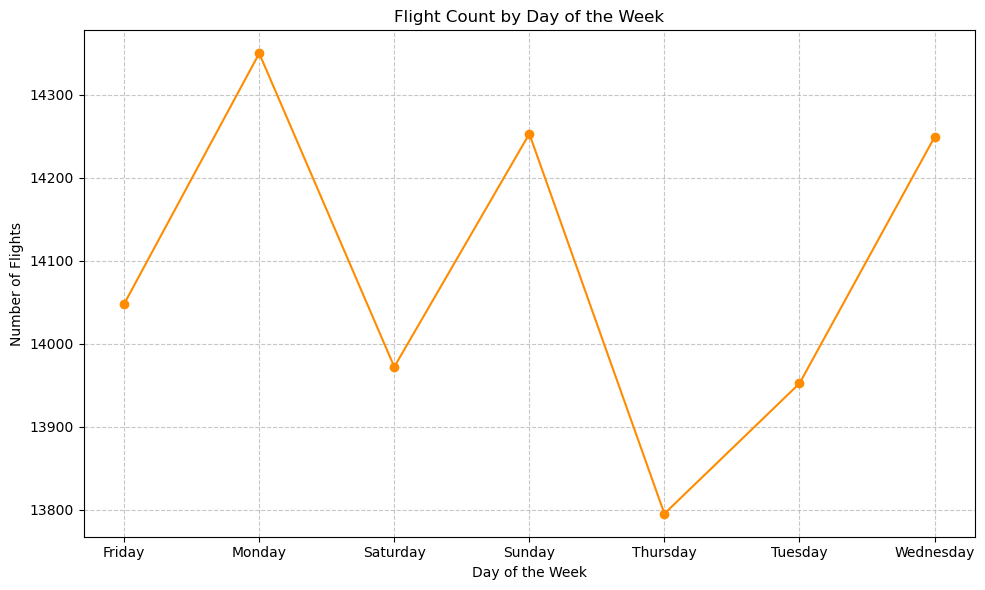

In [49]:
# Flight Count by Departure Day

df['Departure_Date'] = pd.to_datetime(df['Departure_Date'])
df['Day_of_Week'] = df['Departure_Date'].dt.day_name()
day_counts = df['Day_of_Week'].value_counts()
plt.figure(figsize=(10, 6))
day_counts.sort_index().plot(kind='line', marker='o', color='darkorange', linestyle='-')
plt.title("Flight Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flights")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

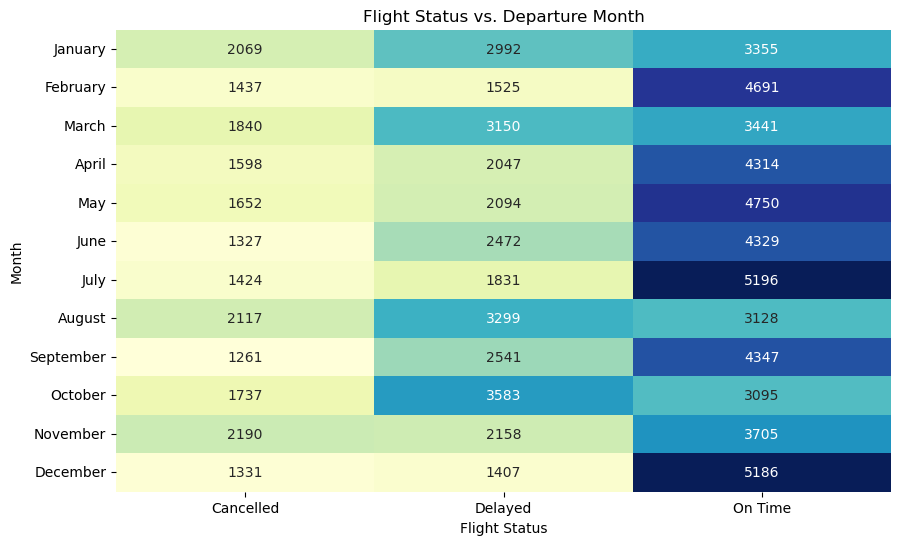

In [51]:
# flight status vs departure month

df['Departure_Month'] = pd.to_datetime(df['Departure_Date']).dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Departure_Month'] = pd.Categorical(df['Departure_Month'], categories=month_order, ordered=True)
df_month_status = df.groupby(['Departure_Month', 'Flight_Status'], observed=False).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(df_month_status, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Flight Status vs. Departure Month')
plt.xlabel('Flight Status')
plt.ylabel('Month')
plt.show()

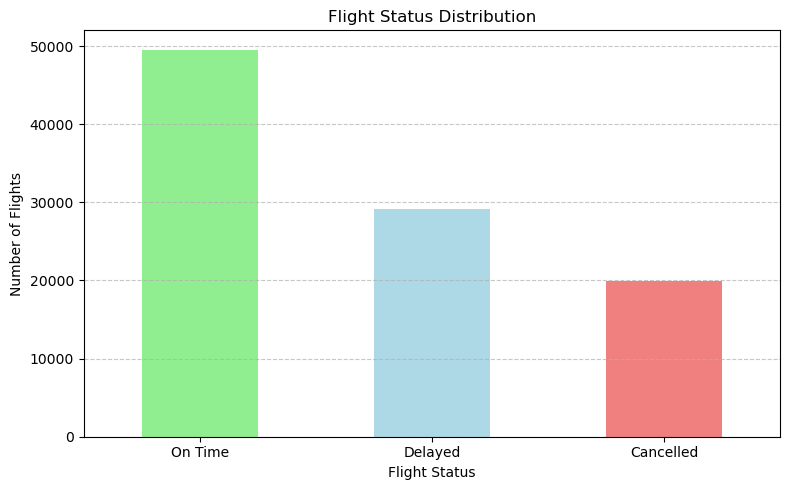

In [52]:
# Flight Status Distribution

flight_status_counts = df['Flight_Status'].value_counts()
plt.figure(figsize=(8, 5))
flight_status_counts.plot(kind='bar', color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title("Flight Status Distribution")
plt.xlabel("Flight Status")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

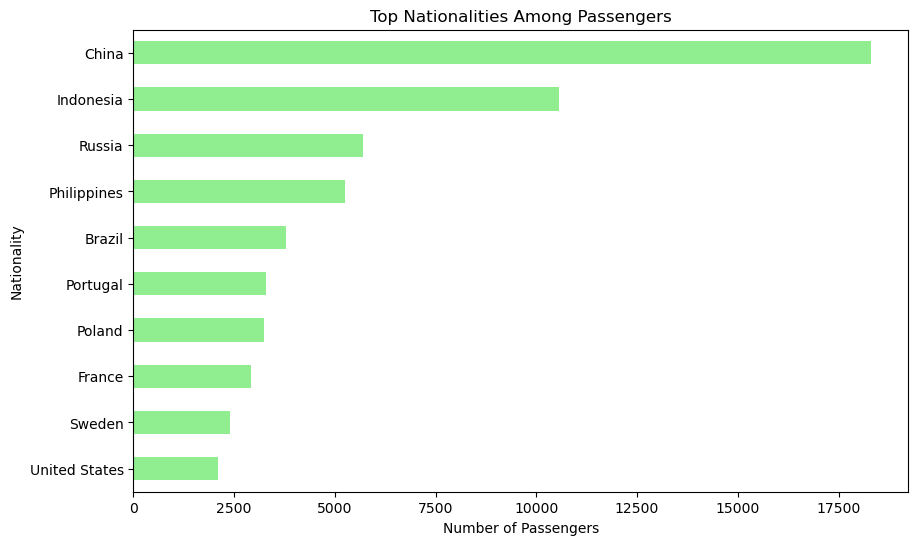

In [55]:
# top nationalities among passengers

top_10_nationalities=df['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_nationalities.plot(kind='barh', color='lightgreen')
plt.title('Top Nationalities Among Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Nationality')
plt.gca().invert_yaxis()
plt.show()

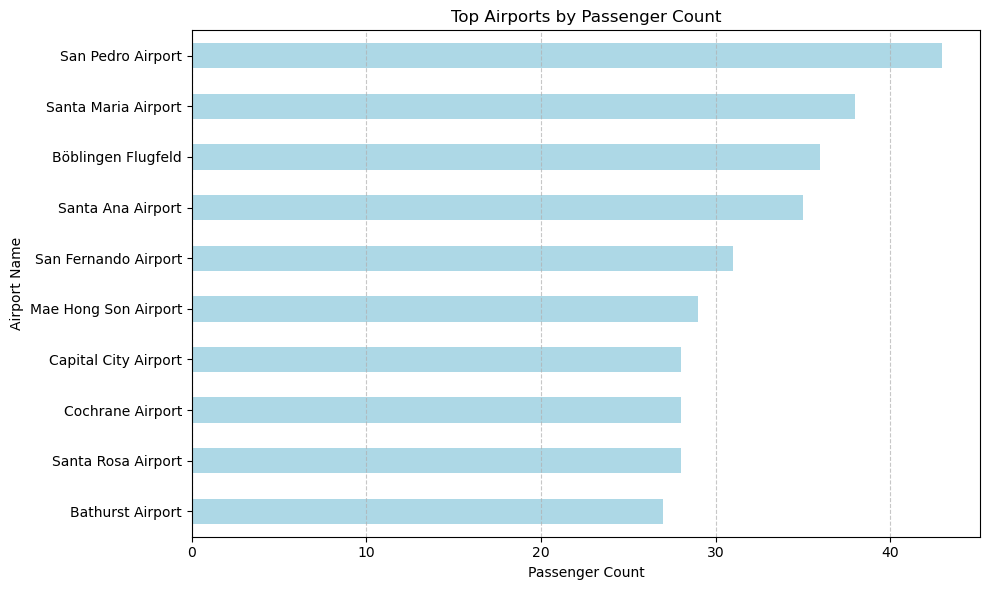

In [57]:
# top airports by passenger count

top_airports = df['Airport_Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_airports.plot(kind='barh', color='lightblue')
plt.title("Top Airports by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Airport Name")
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

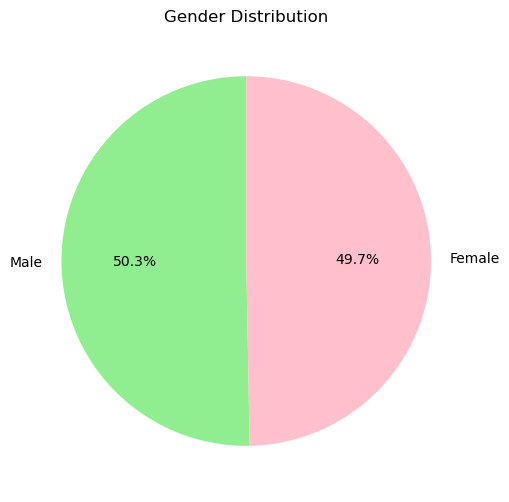

In [59]:
# gender distribution

plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'pink'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

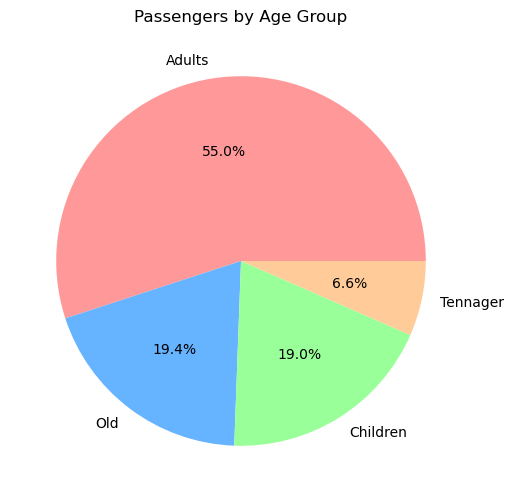

In [61]:
# passengers by age group

def categorize_age(age):
    if age < 14:
        return 'Children'
    elif 14 <= age <= 18:
        return 'Tennager'
    elif 19 <= age < 59:
        return 'Adults'
    else:
        return 'Old'

df['Age_Group'] = df['Age'].apply(categorize_age)
age_group_counts = df['Age_Group'].value_counts()
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2'])
plt.title('Passengers by Age Group')
plt.ylabel('')
plt.show()

<Figure size 1200x800 with 0 Axes>

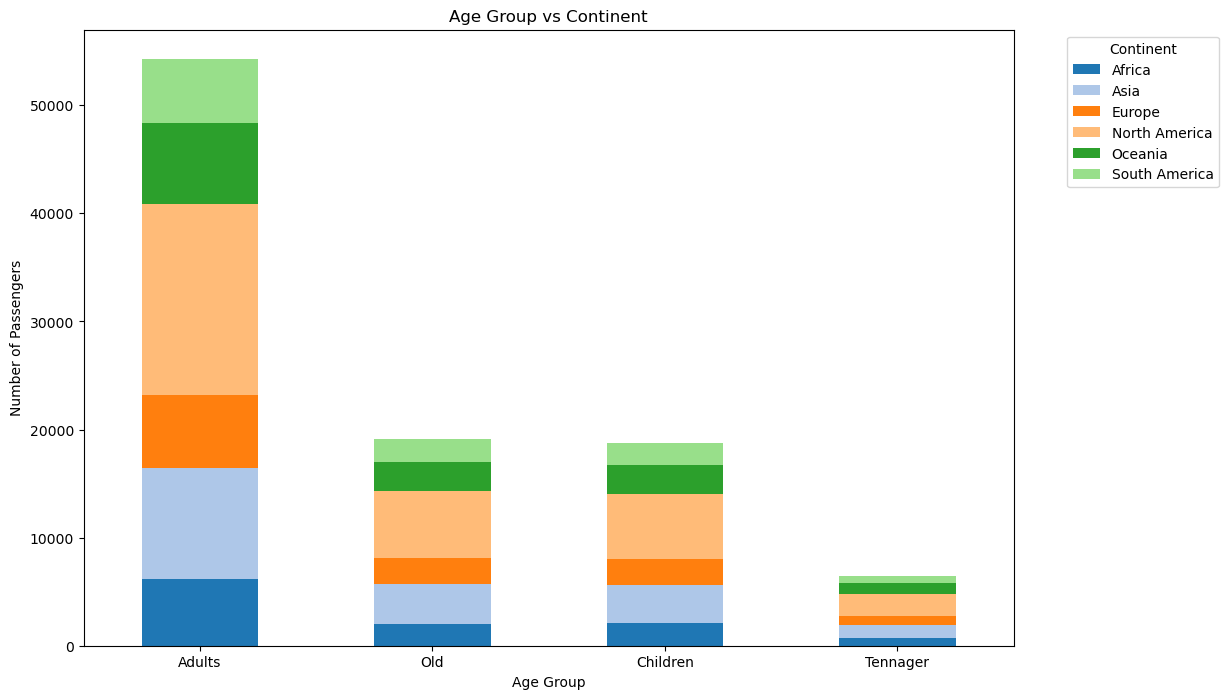

In [63]:
# age group vs continent

plt.figure(figsize=(12, 8))
age_continent_counts = df.groupby(['Age_Group', 'Continents']).size().unstack()
age_continent_counts = age_continent_counts.loc[age_continent_counts.sum(axis=1).sort_values(ascending=False).index]

custom_colors = sns.color_palette("tab20", len(age_continent_counts.columns))

age_continent_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_colors)
plt.title('Age Group vs Continent')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

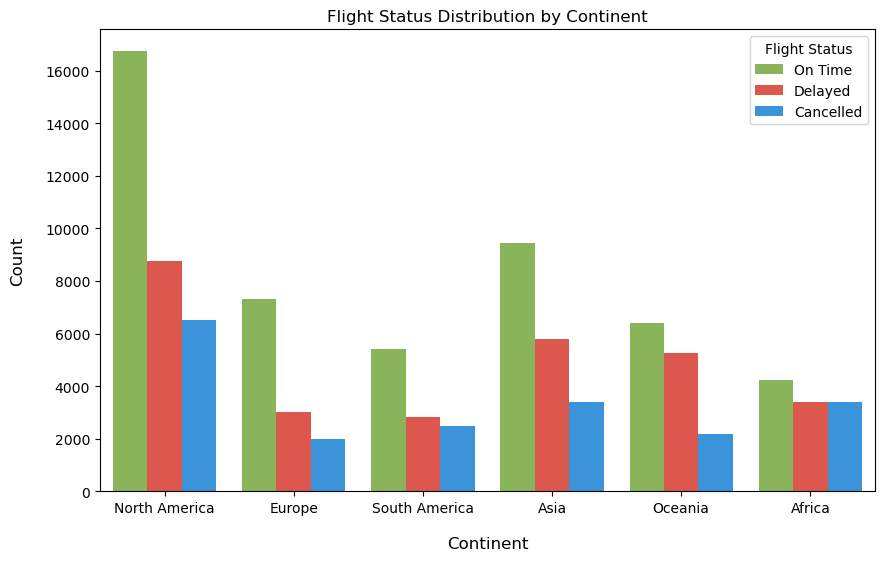

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Continents', hue='Flight_Status', palette=['#8bc34a', '#f44336', '#2196F3'])
plt.title('Flight Status Distribution by Continent', loc='center')
plt.xlabel('Continent', fontsize=12, labelpad=15)
plt.ylabel('Count', fontsize=12, labelpad=15)
plt.xticks(rotation=0, ha='center')  # Horizontal text and centered
plt.legend(title='Flight Status', loc='upper right')
plt.show()